In [3]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pprint
from shapely.geometry import MultiPoint, Polygon, Point, LinearRing 

In [4]:
file = '../../Downloads/ny_new_york_zip_codes_geo.min.json'

In [174]:
gdf = geopandas.read_file(file)
gdf

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,36,12205,3612205,B5,G6350,S,40906445,243508,+42.7187855,-073.8292399,N,"POLYGON ((-73.87052 42.75123, -73.86861 42.756..."
1,36,12009,3612009,B5,G6350,S,135241924,2168637,+42.6975663,-074.0355422,N,"POLYGON ((-74.10891 42.65300, -74.10889 42.653..."
2,36,14804,3614804,B5,G6350,S,144718714,232123,+42.3172588,-077.8479358,N,"POLYGON ((-77.92747 42.34775, -77.92632 42.347..."
3,36,14836,3614836,B5,G6350,S,77612958,131305,+42.5429182,-077.8781933,N,"MULTIPOLYGON (((-77.95599 42.47433, -77.95600 ..."
4,36,14536,3614536,B5,G6350,S,47193482,425175,+42.5439751,-078.0836709,N,"POLYGON ((-78.05030 42.53850, -78.05024 42.538..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1789,36,10503,3610503,B5,G6350,S,38497,0,+41.0265555,-073.8753095,N,"POLYGON ((-73.87383 41.02557, -73.87631 41.025..."
1790,36,10535,3610535,B5,G6350,S,1169775,154348,+41.3351693,-073.7939193,N,"POLYGON ((-73.81299 41.33241, -73.81285 41.332..."
1791,36,14569,3614569,B5,G6350,S,197585027,1112470,+42.7346931,-078.1685932,N,"POLYGON ((-78.19740 42.82658, -78.19619 42.826..."
1792,36,14478,3614478,B5,G6350,S,30311215,0,+42.5778234,-077.1263221,N,"POLYGON ((-77.09451 42.62465, -77.09428 42.624..."


In [176]:
zip_df = pd.read_csv('nyp_zips.csv')
zip_df['zip'] = zip_df['zip'].astype(str)
zip_df
#zip_df.dtypes

,zone,zip
0,Zone A,10707
1,Zone A,10706
2,Zone A,10467
3,Zone A,10522
4,Zone A,10533
...,...,...
65,Hudson Valley,10570
66,Hudson Valley,12508
67,Hudson Valley,10588
68,Hudson Valley,10537


In [6]:
# zone_a = (
# '10707',
# '10706',
# '10467',
# '10522',
# '10533',
# '10709',
# '10708',
# '10465',
# '10705',
# '10470',
# '10530',
# '10552',
# '10583',
# '10606',
# '10801',
# '10469',
# '10034',
# '10703',
# '10701',
# '10462',
# '10601',
# '10607',
# '10463',
# '10471',
# '10804',
# '10475',
# '10466',
# '10538',
# '10805',
# '10502',
# '10550',
# '10528',
# '10605',
# '10543',
# '10704',
# '10461',
# '10803',
# '10573',
# '10553',
# '10580',
# '10710')
# hud_val= ('10566','10567','10598','10596','10521','10520','10548','10511','10562','10510','10547','10579','10535','10505','10541','10589','10512','10516','10524','12524','12533','10928','10591','10546','10570','12508','10588','10537','10527')

In [177]:
# gdf['zone'] = np.where(gdf["ZCTA5CE10"].isin(zone_a), "Zone A", "Other")
gdf = gdf.merge(zip_df, left_on ='ZCTA5CE10', right_on ='zip', how ='left')
gdf.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry,zone,zip
0,36,12205,3612205,B5,G6350,S,40906445,243508,+42.7187855,-073.8292399,N,"POLYGON ((-73.87052 42.75123, -73.86861 42.756...",NaN,NaN
1,36,12009,3612009,B5,G6350,S,135241924,2168637,+42.6975663,-074.0355422,N,"POLYGON ((-74.10891 42.65300, -74.10889 42.653...",NaN,NaN
2,36,14804,3614804,B5,G6350,S,144718714,232123,+42.3172588,-077.8479358,N,"POLYGON ((-77.92747 42.34775, -77.92632 42.347...",NaN,NaN
3,36,14836,3614836,B5,G6350,S,77612958,131305,+42.5429182,-077.8781933,N,"MULTIPOLYGON (((-77.95599 42.47433, -77.95600 ...",NaN,NaN
4,36,14536,3614536,B5,G6350,S,47193482,425175,+42.5439751,-078.0836709,N,"POLYGON ((-78.05030 42.53850, -78.05024 42.538...",NaN,NaN


In [206]:
world = gdf[['zone', 'geometry']]
zones = gdf.dissolve(by='zone')
zones.head()
zones.to_file("zones_file.geojson", driver="GeoJSON")


In [180]:
za = zones.loc[['Westchester'], 'geometry']
hv = zones.loc[['Hudson Valley'], 'geometry']

<AxesSubplot:>

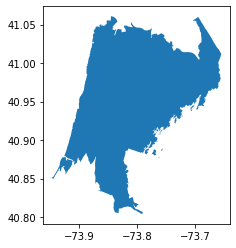

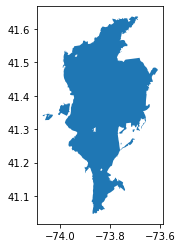

In [179]:
za.plot()
hv.plot()

In [213]:
za.bounds
hv.bounds

,minx,miny,maxx,maxy
zone,,,,
Hudson Valley,-74.070341,41.046494,-73.610835,41.637582


In [36]:
rp = za.representative_point()
rp

zone
Zone A    POINT (-73.82174 40.93237)
dtype: geometry

In [13]:
lenlist = []
for x in range(len(za[0])):
    lenlist.append(len(za[0][x].exterior.coords))

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/576848781.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for x in range(len(za[0])):
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/576848781.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lenlist.append(len(za[0][x].exterior.coords))


In [14]:
lenlist
counter = 0
for x in lenlist:
    counter += x
print(lenlist)
print(counter)
print(round(counter/23,))

[5626, 120, 92, 190, 5, 38, 21, 89, 39, 60, 30, 9, 4, 23, 4, 12, 182, 8, 4]
6556
285


In [189]:
#ex = za[0][0].exterior.coords[0::round(counter/23,)]
ex = za[0][0].exterior.coords[0::280]
hv_ex = hv[0][0].exterior.coords[0::430]

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/860891835.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ex = za[0][0].exterior.coords[0::280]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/860891835.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  hv_ex = hv[0][0].exterior.coords[0::430]


In [190]:
len(ex)
len(hv_ex)

21

In [108]:
ex

[(-73.842905, 40.828478),
 (-73.904913, 40.930289),
 (-73.884976, 40.998743),
 (-73.85936, 41.049505),
 (-73.810632, 41.050131),
 (-73.740237, 41.027901),
 (-73.689164, 41.031844),
 (-73.659447, 41.017651),
 (-73.671653, 40.965281),
 (-73.686521, 40.944206),
 (-73.690424, 40.959098),
 (-73.710459, 40.944847),
 (-73.723195, 40.931777),
 (-73.737685, 40.927729),
 (-73.743322, 40.918321),
 (-73.754567, 40.914751),
 (-73.76318, 40.912827),
 (-73.767022, 40.903912),
 (-73.777958, 40.892851),
 (-73.787124, 40.888521),
 (-73.826345, 40.811196)]

<AxesSubplot:>

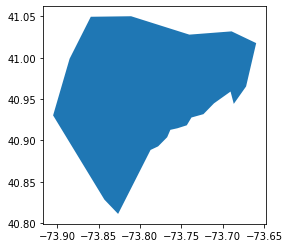

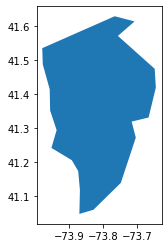

In [191]:
geopandas.GeoSeries(Polygon(ex)).plot()
geopandas.GeoSeries(Polygon(hv_ex)).plot()


In [212]:
d = {'Zone': ['Westchester', 'Hudson Valley'], 'geometry': [Polygon(ex), Polygon(hv_ex)]}
exterior_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
exterior_gdf.to_file("zones_border.geojson", driver="GeoJSON")

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [224]:
ex_add = ex.copy()
hv_add = hv_ex.copy()
# ex_add.append((za.bounds['minx'][0],za.bounds['miny'][0]))
# ex_add.append((za.bounds['maxx'][0],za.bounds['maxy'][0]))
max_coord = za.bounds['maxx'][0],za.bounds['maxy'][0]
min_coord = za.bounds['minx'][0],za.bounds['miny'][0]
hv_max_coord = hv.bounds['maxx'][0],hv.bounds['maxy'][0]
hv_min_coord = hv.bounds['minx'][0],hv.bounds['miny'][0]
# ex_add
def nearest_coord(coord):
    min_diff = 10
    min_index = 0
    counter = 0
    for x,y in ex_add:
        if abs((x - coord[0])) + abs(y - coord[1]) < min_diff:
            min_diff = abs((x - coord[0])) + abs(y-coord[1])
            min_index = counter
        counter +=1
    return min_index
ex_add.insert(nearest_coord(max_coord), max_coord)
ex_add.insert(1, min_coord)
hv_add.insert(nearest_coord(hv_max_coord), hv_max_coord)
hv_add.insert(nearest_coord(hv_min_coord), hv_min_coord)
# hv_add.append(hv_max_coord)
# hv_add.append(hv_min_coord)
ex_add 

[(-73.842905, 40.828478),
 (-73.947051, 40.804001),
 (-73.904913, 40.930289),
 (-73.884976, 40.998743),
 (-73.85936, 41.049505),
 (-73.810632, 41.050131),
 (-73.740237, 41.027901),
 (-73.689164, 41.031844),
 (-73.655241, 41.060744),
 (-73.659447, 41.017651),
 (-73.671653, 40.965281),
 (-73.686521, 40.944206),
 (-73.690424, 40.959098),
 (-73.710459, 40.944847),
 (-73.723195, 40.931777),
 (-73.737685, 40.927729),
 (-73.743322, 40.918321),
 (-73.754567, 40.914751),
 (-73.76318, 40.912827),
 (-73.767022, 40.903912),
 (-73.777958, 40.892851),
 (-73.787124, 40.888521),
 (-73.826345, 40.811196)]

<AxesSubplot:>

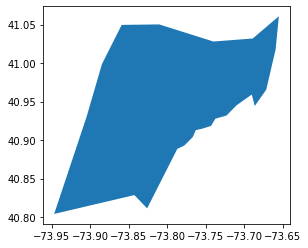

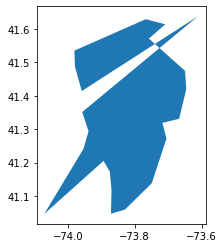

In [225]:
geopandas.GeoSeries(Polygon(ex_add)).plot()
geopandas.GeoSeries(Polygon(hv_add)).plot()


In [22]:
geopandas.GeoSeries(Polygon(ex_add)).to_file("zones_border_minmax.geojson", driver="GeoJSON")

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [27]:
ex

[(-73.842905, 40.828478),
 (-73.904913, 40.930289),
 (-73.884976, 40.998743),
 (-73.85936, 41.049505),
 (-73.810632, 41.050131),
 (-73.740237, 41.027901),
 (-73.689164, 41.031844),
 (-73.659447, 41.017651),
 (-73.671653, 40.965281),
 (-73.686521, 40.944206),
 (-73.690424, 40.959098),
 (-73.710459, 40.944847),
 (-73.723195, 40.931777),
 (-73.737685, 40.927729),
 (-73.743322, 40.918321),
 (-73.754567, 40.914751),
 (-73.76318, 40.912827),
 (-73.767022, 40.903912),
 (-73.777958, 40.892851),
 (-73.787124, 40.888521),
 (-73.826345, 40.811196),
 (-73.947051, 40.804001),
 (-73.655241, 41.060744)]

In [28]:
ex_simple = za[0][0].exterior.simplify
ex_simple.

SyntaxError: invalid syntax (1244781715.py, line 2)

In [29]:
geopandas.GeoSeries(LinearRing(ex_simple)).plot()

NameError: name 'ex_simple' is not defined

In [32]:
ex_more = za[0][0].exterior.coords[0::40]

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/940701626.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ex_more = za[0][0].exterior.coords[0::40]


In [33]:
len(ex_more)

141

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/3696550233.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ex_more_buffer = za[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::29]
/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/3696550233.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  hv_ex_more_buffer = hv[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::68]


<AxesSubplot:>

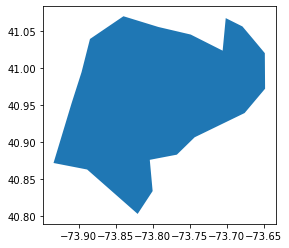

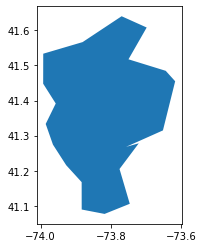

In [203]:
ex_more_buffer = za[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::29]
hv_ex_more_buffer = hv[0][0].buffer(0.01,16, join_style = 2).exterior.coords[0::68]
geopandas.GeoSeries(Polygon(ex_more_buffer)).plot()
geopandas.GeoSeries(Polygon(hv_ex_more_buffer)).plot()

In [204]:
len(ex_more_buffer)
len(hv_ex_more_buffer)

20

In [207]:
geopandas.GeoSeries([Polygon(ex_more_buffer), Polygon(hv_ex_more_buffer)]).to_file("buffer.geojson", driver="GeoJSON")

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [95]:
len(za[0][0].buffer(0.01,16, join_style = 2).exterior.coords)/20

/var/folders/4_/q_7tb_w52611r6nz11nb05qm0000gp/T/ipykernel_3494/4283740714.py:1: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  len(za[0][0].buffer(0.01,16, join_style = 2).exterior.coords)/20


28.65

In [210]:
d = {'Zone': ['Westchester', 'Hudson Valley'], 'geometry': [Polygon(ex_more_buffer), Polygon(hv_ex_more_buffer)]}
buffer_gdf = geopandas.GeoDataFrame(d, crs="EPSG:4326")
buffer_gdf

,Zone,geometry
0,Westchester,"POLYGON ((-73.93437 40.87170, -73.91002 40.952..."
1,Hudson Valley,"POLYGON ((-73.99264 41.44787, -73.99244 41.533..."


In [211]:
buffer_gdf.to_file("buffer.geojson", driver="GeoJSON")

/Users/paul.nisenson/.conda/envs/gis_project/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
